Truncated Normal(mu=15, sigma=3, lo=1, hi=30) sample (n=50000, seed=54)
min=3.0474, max=27.6529
mean=15.0014, std=2.9983
quantiles:
  p01: 8.0893
  p05: 10.0429
  p10: 11.1709
  p25: 12.9584
  p50: 15.0054
  p75: 17.0274
  p90: 18.8477
  p95: 19.9156
  p99: 21.9189

first 20 samples: [16.3973, 14.1575, 11.7656, 13.8109, 17.8383, 14.2518, 11.2829, 16.2988, 10.1203, 19.4628, 18.4778, 11.6743, 23.5241, 18.1299, 11.1412, 13.7756, 11.5129, 14.0551, 17.1728, 13.9894]


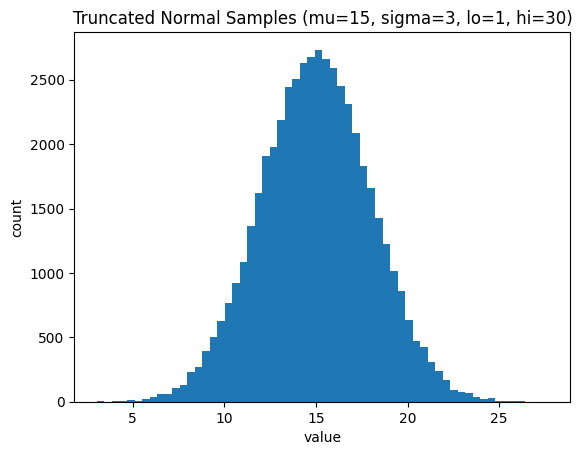

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def truncated_normal(mu: float, sigma: float, lo: float = 0.0, hi: float = float("inf")) -> float:
    """Sample N(mu, sigma) but reject values outside [lo, hi]."""
    if sigma <= 0:
        return max(lo, min(hi, mu))
    while True:
        x = random.gauss(mu, sigma)
        if lo <= x <= hi:
            return x

def show_truncated_normal(mu=5.0, sigma=2.0, lo=0.2, hi=20.0, n=20000, seed=54, bins=60, plot=True):
    """
    Sample a truncated normal distribution and print basic stats + histogram plot.
    """
    random.seed(seed)
    xs = np.array([truncated_normal(mu, sigma, lo, hi) for _ in range(n)], dtype=float)

    qs = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
    qv = np.quantile(xs, qs)

    print(f"Truncated Normal(mu={mu}, sigma={sigma}, lo={lo}, hi={hi}) sample (n={n}, seed={seed})")
    print(f"min={xs.min():.4f}, max={xs.max():.4f}")
    print(f"mean={xs.mean():.4f}, std={xs.std(ddof=1):.4f}")
    print("quantiles:")
    for p, v in zip(qs, qv):
        print(f"  p{int(p*100):02d}: {v:.4f}")

    print("\nfirst 20 samples:", np.round(xs[:20], 4).tolist())

    if plot:
        plt.figure()
        plt.hist(xs, bins=bins)
        plt.title(f"Truncated Normal Samples (mu={mu}, sigma={sigma}, lo={lo}, hi={hi})")
        plt.xlabel("value")
        plt.ylabel("count")
        plt.show()

    return xs
_ = show_truncated_normal(mu=15, sigma=3, lo=1, hi=30, n=50000, seed=54)
